In diesem Notebook werden Bilder mit den assoziierten Sensordaten dargestellt.

In [10]:
# Import von Bibliotheken
import os
import pandas
from scipy.interpolate import interp1d
import numpy as np
import cv2

In [19]:
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from mpl_toolkits.axes_grid1 import ImageGrid

In [51]:
# Lesen der Merkmale
featuresDf = pandas.read_csv("../merkmale.csv")
featuresDf.describe()

FileNotFoundError: File b'../merkmale.csv' does not exist

In [65]:
featuresDf.columns

Index(['Zeitstempel', 'Breitengrad', 'Laengengrad', 'Geschwindigkeit',
       'AccelerometerX', 'AccelerometerY', 'AccelerometerZ', 'Azimuth', 'Nick',
       'Roll', 'SensorZeitstempel', 'Messwerte', 'StartBewegungsD',
       'StartBelichtung', 'Belichtungszeit', 'MittelX', 'MittelY', 'MittelZ',
       'MittelNick', 'MittelRoll', 'AzimuthAenderung', 'VarianzX', 'VarianzY',
       'VarianzZ', 'VarianzNick', 'VarianzRoll', 'AbweichungX', 'AbweichungY',
       'AbweichungZ', 'AbweichungNick', 'AbweichungRoll'],
      dtype='object')

In [66]:
sensorTimestampsDf = pandas.DataFrame(np.array(featuresDf.SensorZeitstempel.str.split(" ").tolist()).astype(float))
accX = pandas.DataFrame(np.array(featuresDf.AccelerometerX.str.split(" ").tolist()).astype(float))
accY = pandas.DataFrame(np.array(featuresDf.AccelerometerY.str.split(" ").tolist()).astype(float))
accZ = pandas.DataFrame(np.array(featuresDf.AccelerometerZ.str.split(" ").tolist()).astype(float))
nick = pandas.DataFrame(np.array(featuresDf.Nick.str.split(" ").tolist()).astype(float))
roll = pandas.DataFrame(np.array(featuresDf.Roll.str.split(" ").tolist()).astype(float))
azimuth = pandas.DataFrame(np.array(featuresDf.Azimuth.str.split(" ").tolist()).astype(float))

In [74]:
row = 7000 # TODO änderung Zugriff mit Hilde eines Zeitstempels?
timestampsMinMax = [sensorTimestampsDf.iloc[row,0],sensorTimestampsDf.iloc[row,-1]]
featuresDf.Zeitstempel[row]

1520521865286

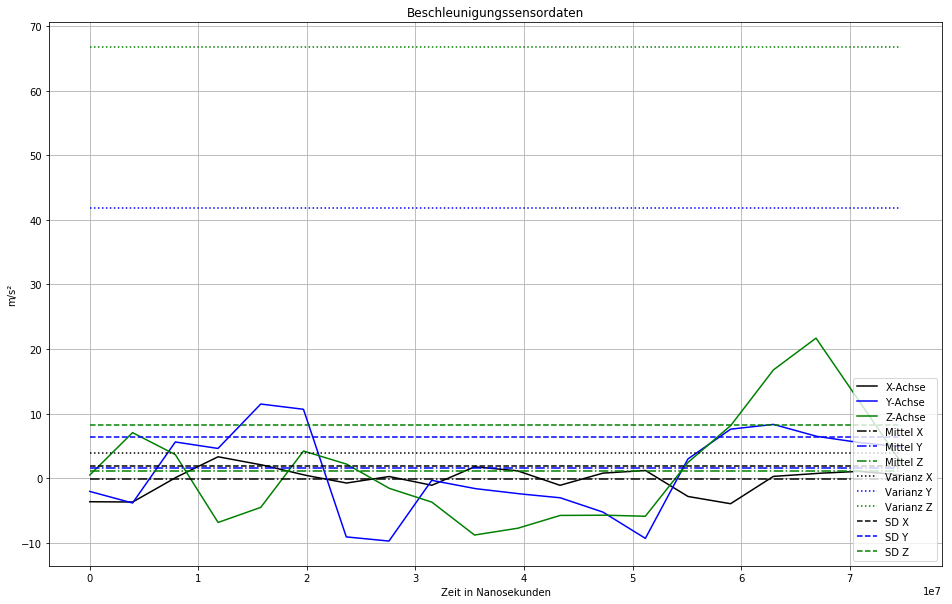

In [96]:
plt.figure(figsize=(16,10))
fAccX = interp1d(np.asarray(sensorTimestampsDf.iloc[[row]]).squeeze(),np.asarray(accX.iloc[[row]]).squeeze())
fAccY = interp1d(np.asarray(sensorTimestampsDf.iloc[[row]]).squeeze(),np.asarray(accY.iloc[[row]]).squeeze())
fAccZ = interp1d(np.asarray(sensorTimestampsDf.iloc[[row]]).squeeze(),np.asarray(accZ.iloc[[row]]).squeeze())
xnew = np.arange(sensorTimestampsDf.iloc[row,0],sensorTimestampsDf.iloc[row,-1],10000)
plt.plot(xnew,fAccX(xnew),'k-',xnew,fAccY(xnew),'b-',xnew,fAccZ(xnew),'g-',
        timestampsMinMax,[featuresDf.MittelX.iloc[row],featuresDf.MittelX.iloc[row]], 'k-.',
        timestampsMinMax,[featuresDf.MittelY.iloc[row],featuresDf.MittelY.iloc[row]], 'g-.',
        timestampsMinMax,[featuresDf.MittelZ.iloc[row],featuresDf.MittelZ.iloc[row]], 'b-.',
        timestampsMinMax,[featuresDf.VarianzX.iloc[row],featuresDf.VarianzX.iloc[row]], 'k:',
        timestampsMinMax,[featuresDf.VarianzY.iloc[row],featuresDf.VarianzY.iloc[row]], 'b:',
        timestampsMinMax,[featuresDf.VarianzZ.iloc[row],featuresDf.VarianzZ.iloc[row]], 'g:',
        timestampsMinMax,[featuresDf.AbweichungX.iloc[row],featuresDf.AbweichungX.iloc[row]], 'k--',
        timestampsMinMax,[featuresDf.AbweichungY.iloc[row],featuresDf.AbweichungY.iloc[row]], 'b--',
        timestampsMinMax,[featuresDf.AbweichungZ.iloc[row],featuresDf.AbweichungZ.iloc[row]], 'g--')
xLine = mlines.Line2D([], [], color='black', linestyle='-', label='X-Achse')
yLine = mlines.Line2D([], [], color='blue', linestyle='-', label='Y-Achse')
zLine = mlines.Line2D([], [], color='green', linestyle='-', label='Z-Achse')
mXLine = mlines.Line2D([], [], color='black', linestyle='-.', label='Mittel X')
mYLine = mlines.Line2D([], [], color='blue', linestyle='-.', label='Mittel Y')
mZLine = mlines.Line2D([], [], color='green', linestyle='-.', label='Mittel Z')
vXline = mlines.Line2D([], [], color='black', linestyle=':', label='Varianz X')
vYline = mlines.Line2D([], [], color='blue', linestyle=':', label='Varianz Y')
vZline = mlines.Line2D([], [], color='green', linestyle=':', label='Varianz Z')
dXline = mlines.Line2D([], [], color='black', linestyle='--', label='SD X')
dYline = mlines.Line2D([], [], color='blue',linestyle='--', label='SD Y')
dZline = mlines.Line2D([], [], color='green', linestyle='--', label='SD Z')
plt.legend(handles=[xLine,yLine,zLine,mXLine,mYLine,mZLine,vXline,vYline,vZline,dXline,dYline,dZline], loc='lower right', framealpha=0.8)
plt.title('Beschleunigungssensordaten')
plt.xlabel('Zeit in Nanosekunden')
plt.ylabel('m/s²')
plt.grid()

In [99]:
featuresDf.AbweichungX.iloc[row]

1.9674200000000002

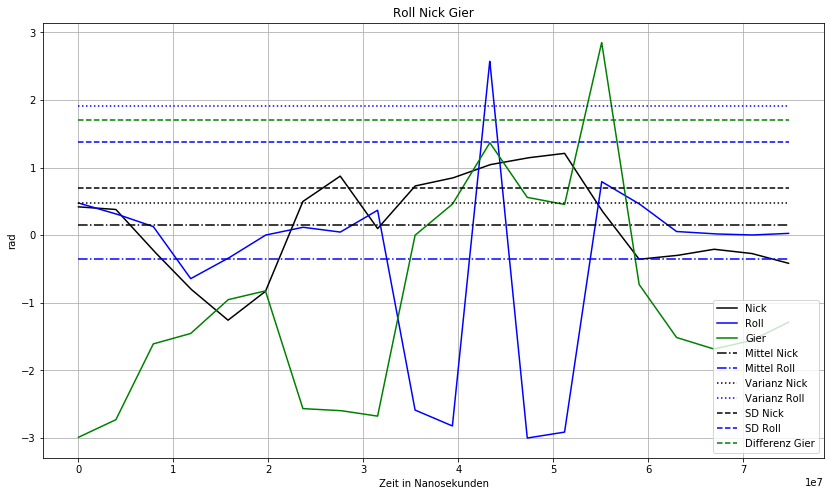

In [98]:
plt.figure(figsize=(14,8))
fNick = interp1d(np.asarray(sensorTimestampsDf.iloc[[row]]).squeeze(),np.asarray(nick.iloc[[row]]).squeeze())
fRoll = interp1d(np.asarray(sensorTimestampsDf.iloc[[row]]).squeeze(),np.asarray(roll.iloc[[row]]).squeeze())
fAzimuth = interp1d(np.asarray(sensorTimestampsDf.iloc[[row]]).squeeze(),np.asarray(azimuth.iloc[[row]]).squeeze())
plt.plot(xnew,fNick(xnew),'k-',xnew,fRoll(xnew),'b-',xnew,fAzimuth(xnew),'g-',
        timestampsMinMax,[featuresDf.MittelNick.iloc[row],featuresDf.MittelNick.iloc[row]], 'k-.',
        timestampsMinMax,[featuresDf.MittelRoll.iloc[row],featuresDf.MittelRoll.iloc[row]], 'b-.',
        timestampsMinMax,[featuresDf.VarianzNick.iloc[row],featuresDf.VarianzNick.iloc[row]], 'k:',
        timestampsMinMax,[featuresDf.VarianzRoll.iloc[row],featuresDf.VarianzRoll.iloc[row]], 'b:',
        timestampsMinMax,[featuresDf.AbweichungNick.iloc[row],featuresDf.AbweichungNick.iloc[row]], 'k--',
        timestampsMinMax,[featuresDf.AbweichungRoll.iloc[row],featuresDf.AbweichungRoll.iloc[row]], 'b--',
        timestampsMinMax,[featuresDf.AzimuthAenderung.iloc[row],featuresDf.AzimuthAenderung.iloc[row]], 'g--')
pLine = mlines.Line2D([], [], color='black', linestyle='-', label='Nick')
rLine = mlines.Line2D([], [], color='blue', linestyle='-', label='Roll')
aLine = mlines.Line2D([], [], color='green', linestyle='-', label='Gier')
mPline = mlines.Line2D([], [], color='black', linestyle='-.', label='Mittel Nick')
mRline = mlines.Line2D([], [], color='blue', linestyle='-.', label='Mittel Roll')
vPline = mlines.Line2D([], [], color='black', linestyle=':', label='Varianz Nick')
vRline = mlines.Line2D([], [], color='blue', linestyle=':', label='Varianz Roll')
dPline = mlines.Line2D([], [], color='black', linestyle='--', label='SD Nick')
dRline = mlines.Line2D([], [], color='blue', linestyle='--', label='SD Roll')
aCline = mlines.Line2D([], [], color='green', linestyle='--', label='Differenz Gier')
plt.legend(handles=[pLine,rLine,aLine,mPline,mRline,vPline,vRline,dPline,dRline,aCline],loc='lower right', framealpha=0.8)
plt.title('Roll Nick Gier')
plt.xlabel('Zeit in Nanosekunden')
plt.ylabel('rad')
plt.grid()

In [49]:
# Lade Bilder in eine Liste
images = []
# Hier können die Datensätze ausgewählt werden
datasets = ['11','12','13']
# Die Pfade zu den Ordnern in welchem sich die Bilder befinden
paths = []

In [50]:
for dataset in datasets: # Für jeden Datensatz merke Pfad
    paths.append("E:/bachelor/daten/" + dataset + "/zugeschnitten/")
for path in paths: # Für jeden Pfad hole die Namen der Ordner
    folders = os.listdir(path)
    for folder in folders: # Aus der Liste der Ordner wird ein Ordner ausgewählt
        filesPath = path + folder + "/"
        print(filesPath)
        files = os.listdir(filesPath)
        for name in files: # Ein Dateiname aus diesem Ordner
            if "jpg" not in name:
                continue
            images.append(cv2.imread(filesPath + name, cv2.COLOR_BGR2GRAY)) # Bild wird gelesen

E:/bachelor/daten/11/zugeschnitten/1/
E:/bachelor/daten/11/zugeschnitten/2/
E:/bachelor/daten/11/zugeschnitten/3/
E:/bachelor/daten/11/zugeschnitten/4/
E:/bachelor/daten/11/zugeschnitten/5/
E:/bachelor/daten/11/zugeschnitten/6/
E:/bachelor/daten/11/zugeschnitten/7/
E:/bachelor/daten/12/zugeschnitten/1/
E:/bachelor/daten/12/zugeschnitten/2/
E:/bachelor/daten/12/zugeschnitten/3/
E:/bachelor/daten/12/zugeschnitten/4/
E:/bachelor/daten/12/zugeschnitten/5/
E:/bachelor/daten/13/zugeschnitten/1/
E:/bachelor/daten/13/zugeschnitten/2/
E:/bachelor/daten/13/zugeschnitten/3/
E:/bachelor/daten/13/zugeschnitten/4/
E:/bachelor/daten/13/zugeschnitten/5/
E:/bachelor/daten/13/zugeschnitten/6/


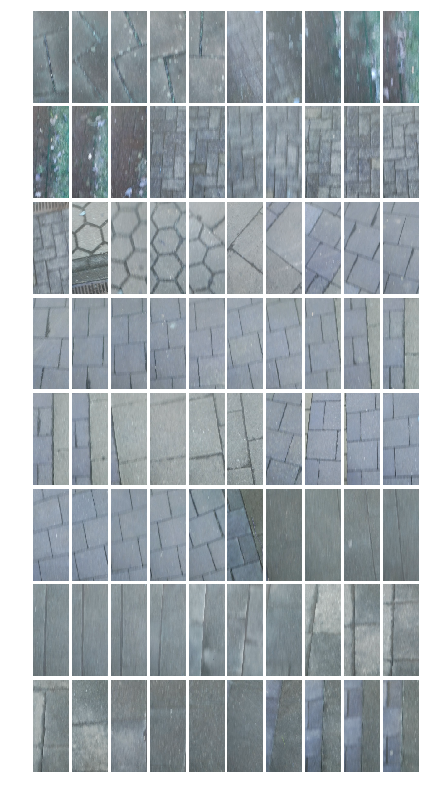

In [48]:
# Plot Beispiel Bilder
fig = plt.figure(1, figsize=(20,14))
# Anzahl der Bilder >= 10
imageToShow = 80
# Start Index des ersten Bildes
startIndex = 0
grid = ImageGrid(fig, 111, nrows_ncols=(int(imageToShow/10), 10), axes_pad=0.05)
for i, img in enumerate(images[startIndex: startIndex + imageToShow]):
    ax = grid[i]
    ax.imshow(img, cmap='gray')
    ax.axis('off')
plt.show()